# HOUSE PRICES PREDICTION

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [13]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [14]:
pd.set_option('max_columns', None)
pd.options.display.float_format = "{:,.2f}".format

In [74]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

In [16]:
import warnings
warnings.filterwarnings('ignore')

# Read data. First view

In [17]:
df = pd.read_csv('train.csv')

In [18]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,"2,003.00",RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,"1,976.00",RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,"2,001.00",RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,"1,998.00",Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,"2,000.00",RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
df.shape

(1460, 81)

In [20]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,"1,460.00","1,460.00","1,201.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,452.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,379.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00"
mean,730.50,56.90,70.05,"10,516.83",6.10,5.58,"1,971.27","1,984.87",103.69,443.64,46.55,567.24,"1,057.43","1,162.63",346.99,5.84,"1,515.46",0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,"1,978.51",1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,"2,007.82","180,921.20"
std,421.61,42.30,24.28,"9,981.26",1.38,1.11,30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.69,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,"79,442.50"
min,1.00,20.00,21.00,"1,300.00",1.00,1.00,"1,872.00","1,950.00",0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,"1,900.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,"2,006.00","34,900.00"
25%,365.75,20.00,59.00,"7,553.50",5.00,5.00,"1,954.00","1,967.00",0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,"1,129.50",0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,"1,961.00",1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,"2,007.00","129,975.00"
50%,730.50,50.00,69.00,"9,478.50",6.00,5.00,"1,973.00","1,994.00",0.00,383.50,0.00,477.50,991.50,"1,087.00",0.00,0.00,"1,464.00",0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,"1,980.00",2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,"2,008.00","163,000.00"
75%,"1,095.25",70.00,80.00,"11,601.50",7.00,6.00,"2,000.00","2,004.00",166.00,712.25,0.00,808.00,"1,298.25","1,391.25",728.00,0.00,"1,776.75",1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,"2,002.00",2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,"2,009.00","214,000.00"
max,"1,460.00",190.00,313.00,"215,245.00",10.00,9.00,"2,010.00","2,010.00","1,600.00","5,644.00","1,474.00","2,336.00","6,110.00","4,692.00","2,065.00",572.00,"5,642.00",3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,"2,010.00",4.00,"1,418.00",857.00,547.00,552.00,508.00,480.00,738.00,"15,500.00",12.00,"2,010.00","755,000.00"


# Missing values

In [21]:
df.isna().sum().to_numpy()

array([   0,    0,    0,  259,    0,    0, 1369,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    8,    8,    0,    0,    0,   37,   37,   38,
         37,    0,   38,    0,    0,    0,    0,    0,    0,    1,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,  690,   81,   81,   81,    0,    0,   81,   81,    0,
          0,    0,    0,    0,    0,    0, 1453, 1179, 1406,    0,    0,
          0,    0,    0,    0], dtype=int64)

In [22]:
df.isna().sum().to_numpy().max()

1453

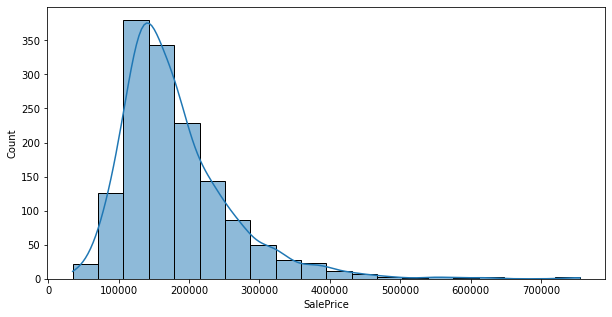

In [23]:
plt.figure(figsize=(10, 5))
sns.histplot(df.SalePrice, bins=20, kde=True);

In [24]:
round(df.SalePrice.mean())

180921

In [25]:
round(df.SalePrice.median())

163000

## Working with null numerical data. 

In [26]:
numerical_data = df.select_dtypes(['int64', 'float64']).drop(['SalePrice', 'Id'], axis=1)

In [27]:
numerical_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.00,8450,7,5,2003,2003,196.00,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,"2,003.00",2,548,0,61,0,0,0,0,0,2,2008
1,20,80.00,9600,6,8,1976,1976,0.00,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,"1,976.00",2,460,298,0,0,0,0,0,0,5,2007
2,60,68.00,11250,7,5,2001,2002,162.00,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,"2,001.00",2,608,0,42,0,0,0,0,0,9,2008
3,70,60.00,9550,7,5,1915,1970,0.00,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,"1,998.00",3,642,0,35,272,0,0,0,0,2,2006
4,60,84.00,14260,8,5,2000,2000,350.00,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,"2,000.00",3,836,192,84,0,0,0,0,0,12,2008


In [28]:
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [29]:
numerical_data.shape

(1460, 36)

In [30]:
numerical_missing_value_data = numerical_data.isna().sum()
numerical_missing_value_data[numerical_missing_value_data > 0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

### LotFrontage feature

LotFrontage - linear feet of street connected to property.
- 259 missed values

In [31]:
lot_frontage = numerical_data.LotFrontage
lot_frontage.head()

0   65.00
1   80.00
2   68.00
3   60.00
4   84.00
Name: LotFrontage, dtype: float64

In [32]:
lot_frontage.describe()

count   1,201.00
mean       70.05
std        24.28
min        21.00
25%        59.00
50%        69.00
75%        80.00
max       313.00
Name: LotFrontage, dtype: float64

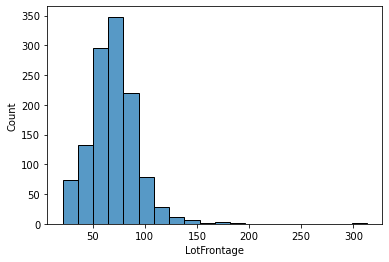

In [33]:
sns.histplot(lot_frontage, bins=20);

It looks like normal distribution with some outliers

<AxesSubplot:xlabel='LotFrontage'>

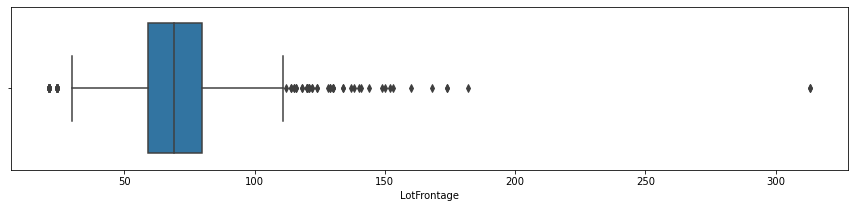

In [34]:
plt.figure(figsize=(15, 3))
sns.boxplot(data=lot_frontage, x=lot_frontage)

**Conclusion:** If in future I decide to save this feature it will be better to use median to fill missing values

### MasVnrArea

MasVnrArea - masonry veneer area in square feet (площадь облицовки каменной кладкой)
- 8 missing values

In [35]:
mas_vnr_area = numerical_data.MasVnrArea
mas_vnr_area.head()

0   196.00
1     0.00
2   162.00
3     0.00
4   350.00
Name: MasVnrArea, dtype: float64

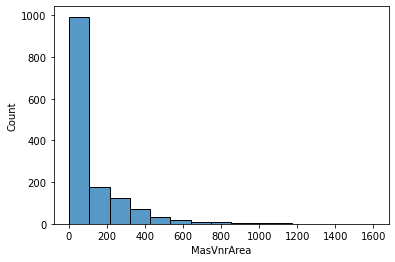

In [36]:
sns.histplot(mas_vnr_area, bins=15);

In [37]:
mas_vnr_area.median()

0.0

### GarageYrBlt 

GarageYrBlt - year garage was built

- 81 missing values

In [38]:
garage_building_year = numerical_data.GarageYrBlt
garage_building_year.head()

0   2,003.00
1   1,976.00
2   2,001.00
3   1,998.00
4   2,000.00
Name: GarageYrBlt, dtype: float64

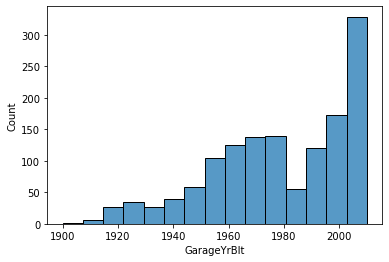

In [39]:
sns.histplot(garage_building_year);

**Conclusion:** it makes sense to generate new feature that shows garage age. But I have no idea when this dataset was gathered.

### Should we just remove all records with null values?

In [40]:
df.isna().apply(lambda row: any(row), axis=1).value_counts()

True    1460
dtype: int64

In [41]:
numerical_data.isna().apply(lambda row: any(row), axis=1).value_counts()

False    1121
True      339
dtype: int64

The code above shows that major part of records have null values. Also we can make the conclusion that most of the null values are in categorical attributes.

In [42]:
imputer = SimpleImputer(strategy='median')
imputer.fit(numerical_data)

filled_numerical_data = pd.DataFrame(imputer.transform(numerical_data), columns=list(numerical_data))

# Scaling (StandardScaler)

In [43]:
scaler = StandardScaler()
scaler.fit(numerical_data)

StandardScaler()

In [44]:
scaled_numerical_data = scaler.transform(numerical_data)
scaled_numerical_data = pd.DataFrame(scaled_numerical_data, columns=list(numerical_data))

In [45]:
scaled_numerical_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.07,-0.21,-0.21,0.65,-0.52,1.05,0.88,0.51,0.58,-0.29,-0.94,-0.46,-0.79,1.16,-0.12,0.37,1.11,-0.24,0.79,1.23,0.16,-0.21,0.91,-0.95,0.99,0.31,0.35,-0.75,0.22,-0.36,-0.12,-0.27,-0.07,-0.09,-1.60,0.14
1,-0.87,0.41,-0.09,-0.07,2.18,0.16,-0.43,-0.57,1.17,-0.29,-0.64,0.47,0.26,-0.80,-0.12,-0.48,-0.82,3.95,0.79,-0.76,0.16,-0.21,-0.32,0.60,-0.10,0.31,-0.06,1.63,-0.70,-0.36,-0.12,-0.27,-0.07,-0.09,-0.49,-0.61
2,0.07,-0.08,0.07,0.65,-0.52,0.98,0.83,0.32,0.09,-0.29,-0.30,-0.31,-0.63,1.19,-0.12,0.52,1.11,-0.24,0.79,1.23,0.16,-0.21,-0.32,0.60,0.91,0.31,0.63,-0.75,-0.07,-0.36,-0.12,-0.27,-0.07,-0.09,0.99,0.14
3,0.31,-0.41,-0.10,0.65,-0.52,-1.86,-0.72,-0.57,-0.50,-0.29,-0.06,-0.69,-0.52,0.94,-0.12,0.38,1.11,-0.24,-1.03,-0.76,0.16,-0.21,0.30,0.60,0.79,1.65,0.79,-0.75,-0.18,4.09,-0.12,-0.27,-0.07,-0.09,-1.60,-1.37
4,0.07,0.57,0.38,1.37,-0.52,0.95,0.73,1.36,0.46,-0.29,-0.17,0.20,-0.05,1.62,-0.12,1.30,1.11,-0.24,0.79,1.23,1.39,-0.21,1.53,0.60,0.87,1.65,1.70,0.78,0.56,-0.36,-0.12,-0.27,-0.07,-0.09,2.10,0.14


In [46]:
numerical_data.shape

(1460, 36)

# Outliers

The plan is to display **boxplot** for each feature and then using threshold **Q1 - IQR * 1.5 AND Q3 - IQR * 1.5**

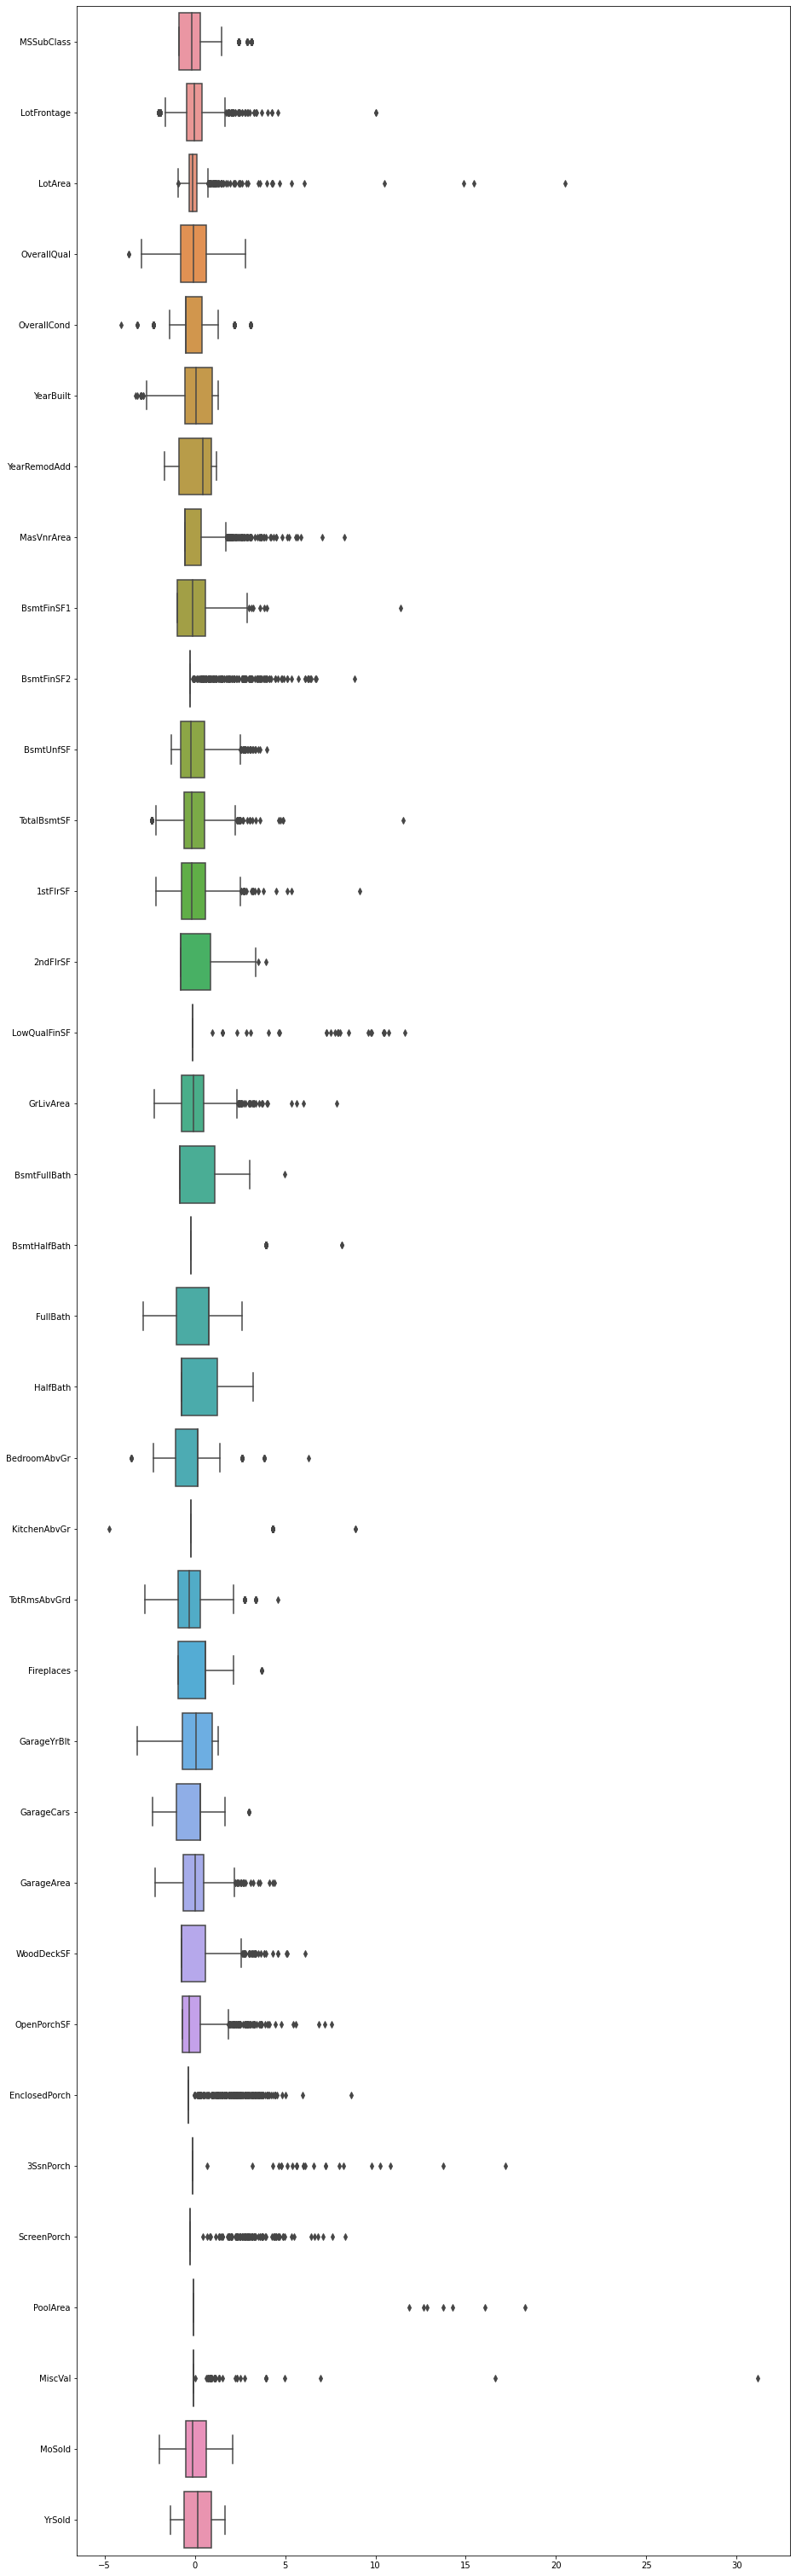

In [47]:
plt.figure(figsize=(15, 55))

sns.boxplot(data=scaled_numerical_data, orient='horizontal');
    

**Features that require extra anylasis**

- LotArea
- BsmtFinSF1
- BsmtFinSF2
- LowQualFinSF
- BsmtHalfBath
- KitchenAbvGr
- OpenPorchSF
- EnclosedPorch
- 3SsnPorch
- ScreenPorch

In [48]:
q1 = numerical_data.quantile(0.25)
q3 = numerical_data.quantile(0.75)
IQR = q3 - q1

In [49]:
outliers = ((numerical_data > q3 + IQR * 1.5) | (numerical_data < q1 - IQR * 1.5))

In [50]:
outliers.head(1)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [51]:
amount_outliers = pd.Series(outliers.sum())

In [52]:
amount_outliers.median()

27.5

In [53]:
amount_outliers.sum()

1596

In [54]:
numerical_data.shape

(1460, 36)

In [55]:
outliers.apply(lambda row: any(row), axis=1).value_counts()

True     886
False    574
dtype: int64

886 records have at least 1 outlier

# Categorical variables analysis

In [56]:
categorical_data = df.select_dtypes(['object'])
categorical_data.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [57]:
amount_missing_categorical = categorical_data.isna().sum()
amount_missing_categorical[amount_missing_categorical > 0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

There we can make a conclusion that first of all features (PoolQC, Fence, MiscFeature, FirePlaceQu, Alley) must be removed. Also there is a question about features related with Garage.

In [58]:
cleared_categorical_data = categorical_data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
cleared_categorical_data.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


## Fill Garage categorical features using numerical data

In [59]:
garage_attributes = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

In [60]:
garage_data = categorical_data[garage_attributes]
garage_data.head()

,GarageType,GarageFinish,GarageQual,GarageCond
0,Attchd,RFn,TA,TA
1,Attchd,RFn,TA,TA
2,Attchd,RFn,TA,TA
3,Detchd,Unf,TA,TA
4,Attchd,RFn,TA,TA


In [61]:
for attribute in garage_attributes:
    print(attribute + ': ')
    print(garage_data[attribute].unique())
    print(10*'-')

GarageType: 
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
----------
GarageFinish: 
['RFn' 'Unf' 'Fin' nan]
----------
GarageQual: 
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
----------
GarageCond: 
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
----------


In [62]:
garage_data.shape

(1460, 4)

Remove all null target values

In [92]:
garage_type_data = garage_data['GarageType']

train_garage_type_data = garage_type_data[~garage_type_data.isna()]
train_numerical_data = filled_numerical_data[~garage_type_data.isna()]

print(train_garage_type_data.shape)
print(train_numerical_data.shape)

(1379,)
(1379, 36)


In [93]:
encoder = OneHotEncoder()
encoder.fit(pd.DataFrame(train_garage_type_data))
train_encoded_garage_type_data = encoder.transform(pd.DataFrame(train_garage_type_data)).toarray()

In [94]:
scaler = StandardScaler()
train_scaled_numerical_data = scaler.fit_transform(train_numerical_data)

In [95]:
train_scaled_numerical_data[0]

array([ 0.09698425, -0.24509372, -0.21994052,  0.60426113, -0.53482706,
        1.02288469,  0.85944737,  0.47594631,  0.54495729, -0.29283308,
       -0.94870117, -0.50077752, -0.83006172,  1.13924022, -0.10307311,
        0.33781599,  1.1077851 , -0.24659391,  0.76639213,  1.20278306,
        0.17211218, -0.19611345,  0.91076327, -0.99383513,  0.99242589,
        0.20494376,  0.25449622, -0.76947774,  0.21052896, -0.3476791 ,
       -0.11975493, -0.27862901, -0.07069017, -0.08553313, -1.60785925,
        0.14124372])

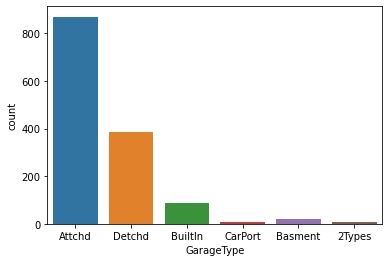

In [113]:
sns.countplot(garage_type_data);

In [149]:
sampling_strategy = { 'Detchd': 800, 'BuiltIn': 600, 'CarPort': 200, 'Basment': 400, 
                    '2Types': 200}

oversample = RandomOverSampler(sampling_strategy=sampling_strategy)
train_balanced_scaled_numerical_data, train_balanced_garage_type_data = oversample.fit_resample(train_scaled_numerical_data, train_garage_type_data)

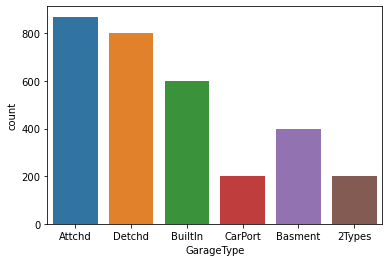

In [150]:
sns.countplot(train_balanced_garage_type_data);

In [151]:
train_balanced_scaled_numerical_data.shape

(3070, 36)

In [152]:
randomforest_clf = RandomForestClassifier()
cross_val_score(randomforest_clf, train_scaled_numerical_data, train_garage_type_data, scoring='accuracy', cv=10).mean()

0.8390140696075321

In [153]:
randomforest_clf = RandomForestClassifier()
cross_val_score(randomforest_clf, train_balanced_scaled_numerical_data, train_balanced_garage_type_data, scoring='accuracy', cv=10).mean()

0.9615635179153095

In [154]:
params = {'n_estimators': list(range(5, 20, 5)), 'max_depth': list(range(5, 15, 5)), 'criterion': ['gini', 'entropy']}

grid_search = GridSearchCV(RandomForestClassifier(), params, scoring='accuracy', cv=5)
grid_search.fit(train_balanced_scaled_numerical_data, train_balanced_garage_type_data)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 10],
                         'n_estimators': [5, 10, 15]},
             scoring='accuracy')

In [155]:
grid_search.best_score_

0.947557003257329

In [156]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 15}